In [15]:
import glob
import pandas as pd

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [17]:
training = glob.glob('./lr*.csv')

In [18]:
training

['./lr_1000_0.0015_0.9.csv',
 './lr_1000_0.0075_0.9.csv',
 './lr_1000_0.00125_0.9.csv',
 './lr_1000_0.0005_0.9.csv',
 './lr_1000_0.001_0.9.csv']

In [19]:
data = [pd.read_csv(x).rename(columns={'Unnamed: 0': 'iteration'}) for x in training]
data = pd.concat(data)

In [20]:
data

,iteration,ts,scores,mean_scores,agent_hash,agent_timestamp,batch_size,learning_rate,gamma
0,0,1.704655e+09,0,0.000000,92f99b56de5e8d02f05d2bced14f91420cf38bb43961a8...,1.704655e+09,1000,0.0015,0.9
1,1,1.704655e+09,0,0.000000,92f99b56de5e8d02f05d2bced14f91420cf38bb43961a8...,1.704655e+09,1000,0.0015,0.9
2,2,1.704655e+09,0,0.000000,92f99b56de5e8d02f05d2bced14f91420cf38bb43961a8...,1.704655e+09,1000,0.0015,0.9
3,3,1.704655e+09,0,0.000000,92f99b56de5e8d02f05d2bced14f91420cf38bb43961a8...,1.704655e+09,1000,0.0015,0.9
4,4,1.704655e+09,0,0.000000,92f99b56de5e8d02f05d2bced14f91420cf38bb43961a8...,1.704655e+09,1000,0.0015,0.9
...,...,...,...,...,...,...,...,...,...
995,995,1.704653e+09,5,7.354418,cef78f346ea0f3bcd019839d28ee0d26e296c0cb9a9902...,1.704651e+09,1000,0.0010,0.9
996,996,1.704653e+09,5,7.352056,cef78f346ea0f3bcd019839d28ee0d26e296c0cb9a9902...,1.704651e+09,1000,0.0010,0.9
997,997,1.704653e+09,12,7.356713,cef78f346ea0f3bcd019839d28ee0d26e296c0cb9a9902...,1.704651e+09,1000,0.0010,0.9
998,998,1.704653e+09,5,7.354354,cef78f346ea0f3bcd019839d28ee0d26e296c0cb9a9902...,1.704651e+09,1000,0.0010,0.9


In [21]:
grouped = data.groupby('agent_hash')

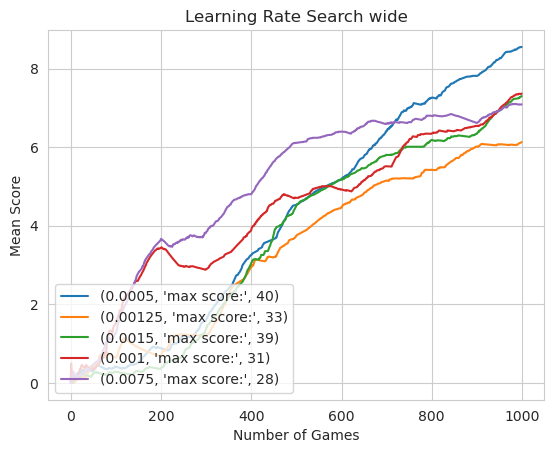

In [22]:
plt.clf()
plt.title('Learning Rate Search wide')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append((g['learning_rate'].values[0], 'max score:', g['scores'].max()))
plt.legend(legend_labels, loc='lower left')
plt.show()

In [23]:
training = glob.glob('./granular_lr*.csv')
training

['./granular_lr_1000_0.0012_0.9.csv',
 './granular_lr_1000_0.0002_0.9.csv',
 './granular_lr_1000_0.0008_0.9.csv',
 './granular_lr_1000_0.0006_0.9.csv',
 './granular_lr_1000_0.0013_0.9.csv',
 './granular_lr_1000_0.0001_0.9.csv',
 './granular_lr_1000_0.0004_0.9.csv',
 './granular_lr_1000_0.0014_0.9.csv',
 './granular_lr_1000_0.0007_0.9.csv',
 './granular_lr_1000_0.001_0.9.csv',
 './granular_lr_1000_0.0011_0.9.csv',
 './granular_lr_1000_0.0005_0.9.csv',
 './granular_lr_1000_0.0009_0.9.csv',
 './granular_lr_1000_0.0003_0.9.csv',
 './granular_lr_1000_0.0015_0.9.csv']

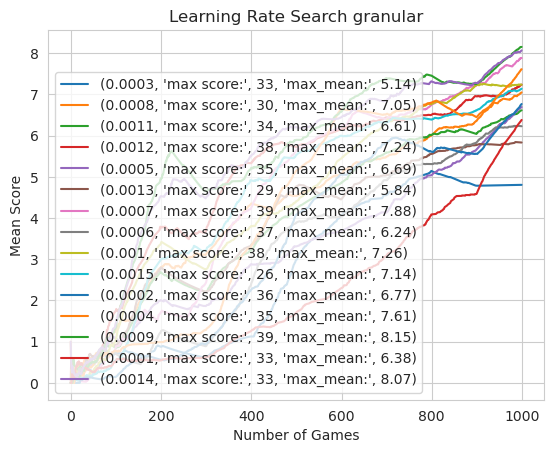

In [24]:
data = [pd.read_csv(x).rename(columns={'Unnamed: 0': 'iteration'}) for x in training]
data = pd.concat(data)
grouped = data.groupby('agent_hash')
plt.clf()
plt.title('Learning Rate Search granular')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append((g['learning_rate'].values[0], 'max score:', g['scores'].max(), 'max_mean:', round(g['mean_scores'].max(),2)))
plt.legend(legend_labels, loc='lower left')
plt.show()